
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**:Andrés Montecinos López

**Rol**:201204515-0

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

¿Qué pregunta (s) estás tratando de resolver (o probar que estás equivocado)?

* Se intenta desarrollar un clasificador de digitos a partir de imagenes escritas a mano, empleando diferentes algoritmos de clasificación pertenecientes a la rama de Machine Learnig y que fueron vistos en clases. Para ello se provee de una matriz de datos previamente manipulada y normalizada, donde se reduce a una entrada de una matriz de 8x8 con datos que van del rango de 0 a 16 que representan el dígito entregado, además del valor objetivo.

 

¿Qué tipos de Datos son?

* Inicialmente se observa que los datos a analizar son de tipo númerico, conformando un total de 1797 datos. De estos se consideran 64 variables de entrada, correspondiente a los pixeles de una imagen, con el objetivo de predecir un digito.
* Por otro lado, cabe señalar que para elaborar la base de datos se consideraron digitos escritos por 43 personas donde 30 de ellas participaron generando digitos para la etapa de entrenamiento y el resto para la etapa de prueba.

In [6]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

In [7]:
digits.shape # En base a esto se y la información de la celda anterior se obtiene que la base de datos 
             # no presenta valores nulos

(1797, 65)

¿Cuántos registros por clase hay?
* En este caso se analizarán al menos 10 clases con digitos de 0 a 10.

In [8]:
digits['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

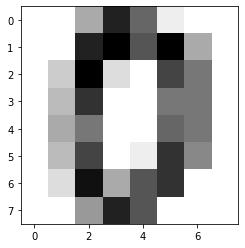

In [9]:
#Ejemplo de digitos
a=digits_dict["images"][0]

plt.imshow(a, cmap=plt.cm.gray_r, interpolation='nearest')

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

Text(0.5, 0.98, 'Distribución variables numéricas')

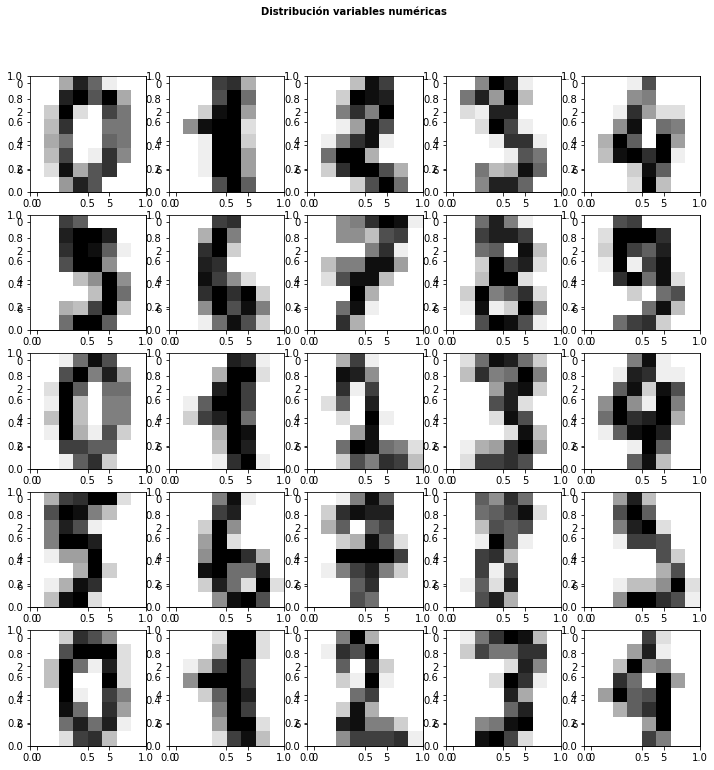

In [10]:

nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12, 12))
#plt.imshow(a, cmap=plt.cm.gray_r, interpolation='nearest')
axes = []
for i in range(nx*ny):
    axes.append(fig.add_subplot(nx,ny,i+1))
    a=digits_dict["images"][i]
    plt.imshow(a, cmap=plt.cm.gray_r, interpolation='nearest')

    

plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")


### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


#### train-test

In [11]:
X = digits.drop(columns="target").values
y = digits["target"].values

#División de Datos
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        digits.drop('target', axis = 'columns'),
                                        digits['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [12]:
print('El conjuto de entrenamiento se conforma de:',y_train.size,'ejemplos')
print('El conjuto de prueba se conforma de:',y_test.size,'ejemplos')

El conjuto de entrenamiento se conforma de: 1437 ejemplos
El conjuto de prueba se conforma de: 360 ejemplos


In [13]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    1437.000000
mean        4.500348
std         2.888510
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: target, dtype: float64


In [14]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    360.000000
mean       4.452778
std        2.774334
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: target, dtype: float64


### Metricas modelos analizados

In [15]:
from sklearn.model_selection import GridSearchCV

from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# nombre modelos
names_models = [
    "RBF SVM", 
    "Decision Tree", 
    "Random Forest"
]


# modelos
classifiers = [
    SVC(kernel='poly',C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

list_models = list(zip(names_models,classifiers))

hiperparametros={
    'RBF SVM': {'gamma': [0.01, 0.1, 2,10]},
    'Decision Tree' : {'max_depth':[2,3,4,5,6]},
    'Random Forest' : {'max_depth':[2,3,4,5,6]}
}   
                 






In [16]:
hiperparametros['RBF SVM']

{'gamma': [0.01, 0.1, 2, 10]}

SVC(C=1, gamma=0.01, kernel='poly')


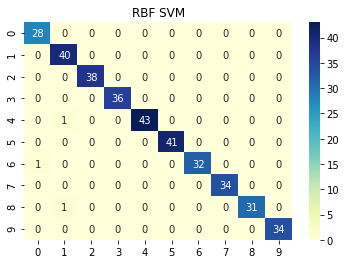

DecisionTreeClassifier(max_depth=6)


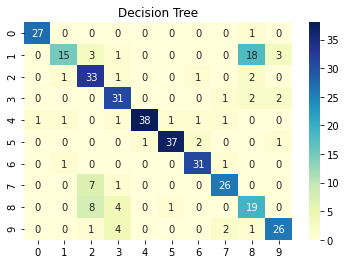

RandomForestClassifier(max_depth=6)


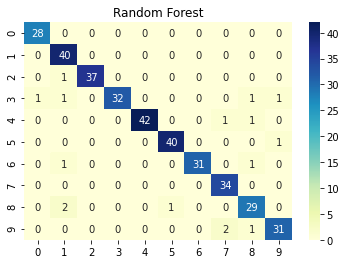

,accuracy,recall,precision,fscore,name models,tiempo
0,0.9917,0.9916,0.9918,0.9915,RBF SVM,6.294335
0,0.7861,0.7897,0.8055,0.7847,Decision Tree,0.611322
0,0.9556,0.9550,0.9567,0.9548,Random Forest,9.857871


In [17]:
from metrics_classification import*
from sklearn.metrics import confusion_matrix
from timeit import default_timer   
import seaborn as sns


frames_metrics = pd.DataFrame([])
for nombre,modelo in list_models:  
    inicio=default_timer()
    grid = GridSearchCV(
    estimator  = modelo,    #modelo a ajustar
    param_grid = hiperparametros[nombre],    #función segúnel nombre del modelo arroje los hiperametros cargados anteriormente
    scoring    = 'neg_root_mean_squared_error',
    n_jobs     = - 1,
    cv         = 10, 
    verbose    = 0,
    return_train_score = True)
    
    
    model_fit = grid.fit(X = X_train, y = y_train)
    modelo_final = grid.best_estimator_
    print(modelo_final)
    preds = modelo_final.predict(X = X_test)
    
    df_temp = pd.DataFrame(
        {
            'y':y_test,
            'yhat': preds
        }
    )
    
    
    a=summary_metrics(df_temp)
    fin=default_timer()
    a['name models']=nombre
    a['tiempo']=fin-inicio
    frames_metrics=pd.concat([frames_metrics,a],axis=0)
   
    matr=confusion_matrix(y_test,preds)
    ind=['0','1','2','3','4','5','6','7','8','9']
    df_cn=pd.DataFrame(matr,index=ind,columns=ind)
    ax = plt.axes()
    grafica=sns.heatmap(df_cn, cmap="YlGnBu",annot=True)
    
    plt.xlabel='Digito'
    plt.ylabel='Digito'
    ax.set_title(nombre)
    plt.show()

frames_metrics    
    
    
    

* el mejor modelo basado en sus métricas es RBF SVM. Además respesto a random forest que tuvo buenas métricas, SVM es más rápido.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

##### Curva de Validación

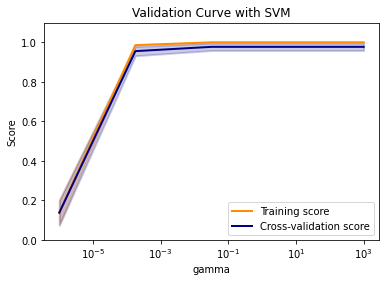

In [18]:


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplots, show
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, 3, 5)
train_scores, test_scores = validation_curve(
    SVC(kernel='poly',C=1), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig, ax = subplots()



plt.title('Validation Curve with SVM')

plt.ylim(0.0, 1.1)
lw = 2
ax.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
ax.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
ax.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
ax.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
ax.legend(loc="best")
ax.set_xlabel('gamma')
ax.set_ylabel('Score')
show()



* se aprecia que del gráfico que para entrenamiento y cross-validation el mejor ajuste del parámetro gama es 0.01

#### Curva AUC–ROC

In [19]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with

X = digits.drop(columns="target").values
y=digits["target"].values
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-20-4836a1f385bd>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


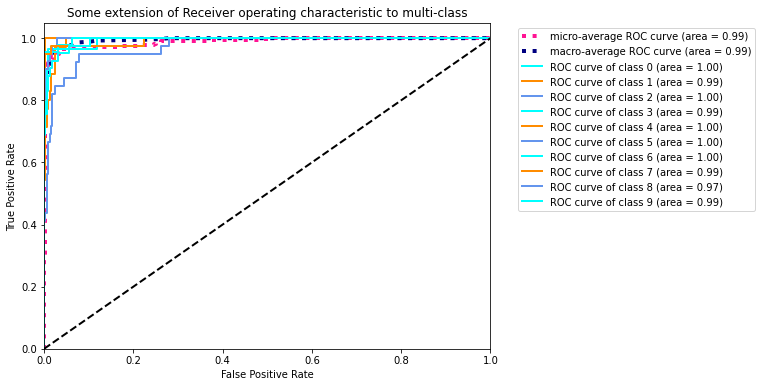

In [20]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves

fig, ax = subplots( figsize=(8,6))

ax.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

ax.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    ax.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

ax.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
ax.legend(bbox_to_anchor=(1.05, 1))
show()

* Las mejores clasificaciones son hechas para la curva de clase 1-7-9.
* Por otro lado existe tendencia a clasificar bien, esto dado que la razon de verdadero positivo es alta y se aleja de la diagonal.

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import chi2,mutual_info_classif

X1 = digits.drop(columns="target")
y1 = digits["target"]

# Aplicando el algoritmo univariante de prueba F.
k = 18  # número de atributos a seleccionar
#columnas = list(X_train1.columns.values)

seleccionadas = SelectKBest(mutual_info_classif, k=k).fit(X1, y1)
selected_features_df = pd.DataFrame({'Feature':list(X1.columns),
                                     'Scores MI':seleccionadas.scores_})
selected_features_df.sort_values(by='Scores MI', ascending=False).head(9)

,Feature,Scores MI
26,c26,0.431665
42,c42,0.422869
21,c21,0.409481
43,c43,0.409048
34,c34,0.406761
33,c33,0.396524
30,c30,0.388319
61,c61,0.387920
38,c38,0.377495


* aqui se muestran las mejores variables usando selección de atributos

In [22]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset

X2 = digits.drop(columns="target")
y2 = digits["target"]

# Create the RFE object and rank each pixel
def error_rfe(n):
    svc = SVC(kernel="linear", C=1,gamma=2)
    rfe = RFE(estimator=svc, n_features_to_select=n, step=1)
    selec=rfe.fit(X2, y2)
    y_pr=selec.predict(X2)
    fina=pd.DataFrame({'pixel':list(range(0,64,1)),'Ranking':selec.ranking_})
    df_temp = pd.DataFrame(
        {
            'y':list(y2),
            'yhat': list(y_pr)
        }
    )
    a=summary_metrics(df_temp)
    return a



In [23]:
error_rfe(2)



,accuracy,recall,precision,fscore
0,0.2922,0.2937,0.2863,0.2471


In [24]:
error_rfe(4)



,accuracy,recall,precision,fscore
0,0.4502,0.4505,0.4663,0.4216


In [25]:
error_rfe(6)



,accuracy,recall,precision,fscore
0,0.6923,0.6928,0.6961,0.6924


In [26]:
error_rfe(8)

,accuracy,recall,precision,fscore
0,0.8542,0.8542,0.8547,0.8539


In [27]:
error_rfe(10)

,accuracy,recall,precision,fscore
0,0.9126,0.9123,0.9123,0.9123


In [28]:
error_rfe(12)

,accuracy,recall,precision,fscore
0,0.9449,0.9447,0.9447,0.9447


In [29]:
error_rfe(14)

,accuracy,recall,precision,fscore
0,0.9816,0.9813,0.9823,0.9815


In [30]:
error_rfe(18)

,accuracy,recall,precision,fscore
0,0.9989,0.9989,0.9989,0.9989


Sobre 15 variables es suficiente para estimar.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [31]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test
    y_aux_true = y_test
    y_aux_pred = y_pred

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

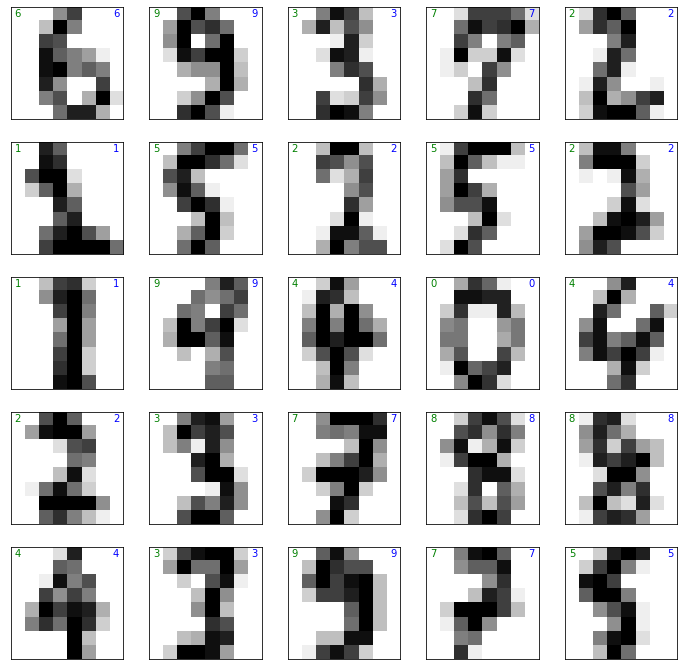

In [32]:
model=svm.SVC(C=1, gamma=0.01, kernel='poly')
mostar_resultados(digits,model,nx=5, ny=5,label = "correctos")


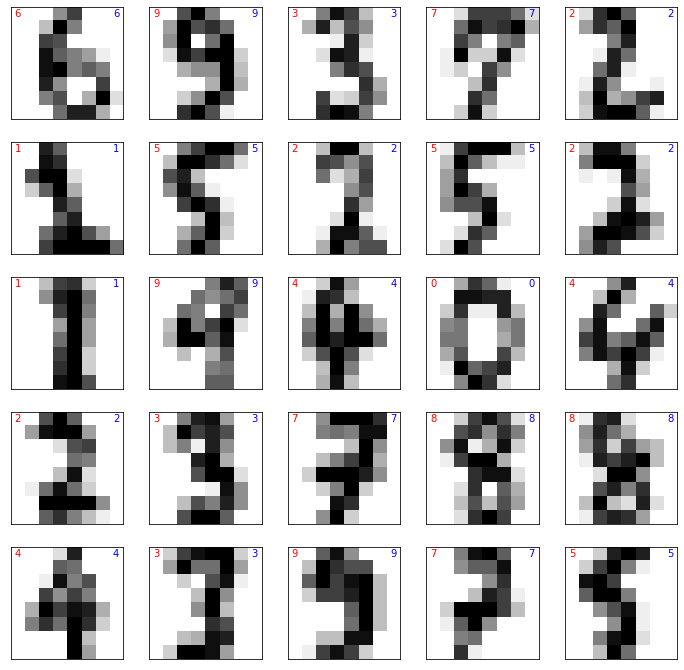

In [33]:
model=svm.SVC(C=1, gamma=0.01, kernel='poly')
mostar_resultados(digits,model,nx=5, ny=5,label="incorrectos")


**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Se cubre una zona mayor a la probista por un numero, el dibujo es poco legible.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.



-Efectivamente se puede obtener una buena predicción acerca de la clasificación de digito usando los algorimos, revisados. En mi caso SVC dio mejores resultados y en promedio en tiempo bajo. Hay que mencionar que gracias a la técnica de GridSearchv fue posible mejorar las  métricas de evaluación mediante una busqueda exhaustiva.

-Respecto a los resultados de graficar imagenes, fue posible observar la precision de los métodos. Análisis de curvas de validación y entrenamiento, son utiles para elección de hiperparámetro, mientras que curva aUC–ROc, es útil para comprender la capacidad de acertar del modelo. 

-Probablemente exista una mayor dificultad del modelo si el fondo de los numeros posee colores similares a la escritura, la letra es poco legible. Las técnicas de reducción de variable permiten, seleccionar los mejores atributos a costa de dismiuir el procesamiento de grandes base de datos, sacrificando una reducción baja de precisión del modelo por lo que son recomendables.